# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

df = pd.DataFrame(columns=['Dice values'])

def dices (x):
    for value in range (x):
        v = random.randint(1,6)
        df.loc[value] = v        

dices(10)

df

,Dice values
0,4
1,5
2,5
3,2
4,4
5,1
6,1
7,5
8,2
9,5


#### 2.- Plot the results sorted by value.

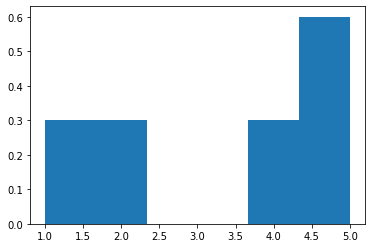

In [173]:
# your code here
x=df["Dice values"]
num_bins = 6

n, bins, features = plt.hist(x, num_bins, density=1)



#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [37]:
# your code here
df['Frequency'] = df.groupby('Dice values')['Dice values'].transform('count')

,Dice values,Frequency
0,4,2
1,5,4
2,5,4
3,2,2
4,4,2
5,1,2
6,1,2
7,5,4
8,2,2
9,5,4


In [5]:
df_freq = df.groupby('Dice values', as_index=False).max()
df_freq

,Dice values,Frequency
0,1,2
1,2,2
2,4,2
3,5,4


/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


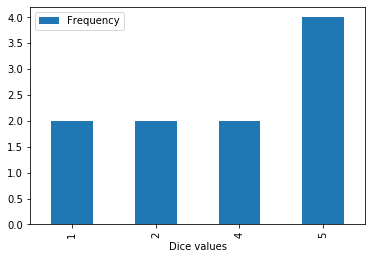

In [6]:
df_freq.plot(x=["Dice values"], y=['Frequency'], kind = "bar")

In [7]:
"""
in both cases and frequency in wich each dice value was returned is presented. 
"""

'\nin both cases and frequency in wich each dice value was returned is presented. \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

mean = df["Dice values"].values.sum()/len(df.index)
mean

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [66]:
# your code here
#df_freq['Frequency'].sum()
mean1 = sum(df_freq['Dice values']*df_freq['Frequency'])/df_freq['Frequency'].sum()
mean1

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [84]:
# your code here

def median (df):
    df = df.sort_values(by='Dice values')
    df = df.reset_index(drop=True)

    median_len = int (len(df.index)/2)

    if len(df.index) % 2 != 0:
        return df.loc[(median_len)/2,'Dice values']

    else: 
        first_term = df.loc[int(len(df.index)/2-1),'Dice values']
        second_term = df.loc[int(len(df.index)/2),'Dice values']
        med = (first_term+second_term)/2
        return med

median(df)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [124]:
# your code here


def quartiles (df):
    df = df.sort_values(by='Dice values')
    df = df.reset_index(drop=True)

    n = int(len(df.index))

    if len(df.index) % 2 != 0:
        Q1 = df.loc[(1/4*(n)),'Dice values']
        Q2 = df.loc[(2/4*(n)),'Dice values']
        Q3 = df.loc[(3/4*(n)),'Dice values']
        Q4 = df.loc[(4/4*(n)),'Dice values']
        return Q1, Q2, Q3, Q4
    
    else:
        Q1 = (df.loc[int(len(df.index)/4-1),'Dice values'] + df.loc[int(len(df.index)/4),'Dice values'])/2
        Q2 = (df.loc[int(len(df.index)/2-1),'Dice values'] + df.loc[int(len(df.index)/2),'Dice values'])/2
        Q3 = (df.loc[int(len(df.index)*3/4-1),'Dice values'] + df.loc[int(len(df.index)*3/4),'Dice values'])/2
        Q4 = float(df.loc[int(len(df.index)-1),'Dice values'])
        return Q1, Q2, Q3, Q4

        
quartiles(df)

(1.5, 4.0, 5.0, 5.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

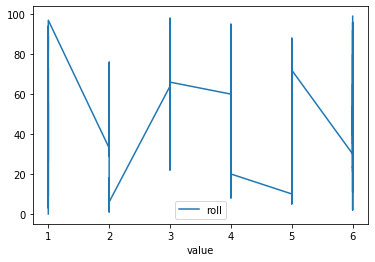

In [141]:
# your code here

roll_dice = pd.read_csv('/home/inrx/Ironhack/Labs-Ironhack/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv',
                       index_col=0)

roll_dice = roll_dice.sort_values(by='value', ascending=True)
#roll_dice.plot(x= 'value', kind = 'bar')

roll_dice.plot(x='value')

In [121]:
"""
The most frequent number is 6. 5 is the least frequent number. 
"""

'\nThe most frequent number is 6. 5 is the least frequent number. \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [126]:
roll_dice.head()

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1


In [129]:
# your code here

mean = roll_dice["value"].values.sum()/len(roll_dice.index)
mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [148]:
# your code here
df_freq['Frequency'] = roll_dice.groupby('value')['value'].transform('count')
#df_freq = roll_dice.groupby('value', as_index=False).max()
df_freq

,value,roll,Frequency
0,1,97,12
1,2,76,17
2,3,98,23
3,4,95,12
4,5,88,23
5,6,99,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

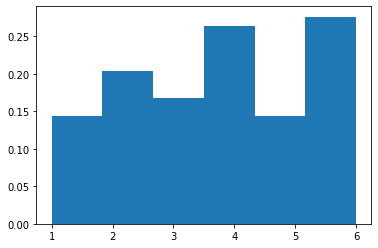

In [147]:
# your code here
x = roll_dice['value']
num_bins = 6
# the histogram of the data
n, bins, features = plt.hist(x, num_bins, density=1)

plt.show()

In [151]:
"""
The mean is the number that seats in the midle of all the values and it's related to the frequency of each value.
For that reason, although the middle value is 4,5, the high frequency of 6 and 4, added the low frequency of 5
skews the mean to the right.
The kurtosis of this historgram is closer to Platykurtic. 
"""

"\nThe mean is the number that seats in the midle of all the values and it's related to the frequency of each value.\nFor that reason, although the middle value is 4,5, the high frequency of 6 and 4, added the low frequency of 5\nskews the mean to the right.\nThe kurtosis of this historgram is closer to Platykurtic. \n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

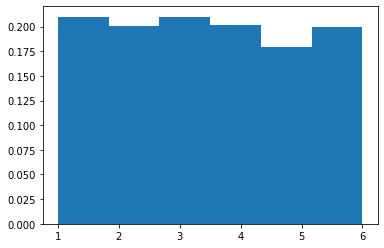

In [158]:
# your code here

roll_dice_th = roll_dice = pd.read_csv('/home/inrx/Ironhack/Labs-Ironhack/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv',index_col=0)

x= roll_dice_th['value']
num_bins = 6
# the histogram of the data
n, bins, features = plt.hist(x, num_bins,density=1)

In [159]:
"""
The distribution is closer to Platykurtic, where all the values have a similar frequency. 
This happens because the number of dice rolls increased. 
"""

'\nThe distribution is closer to Platykurtic, where all the values have a similar frequency. \nThis happens because the number of dice rolls increased. \n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


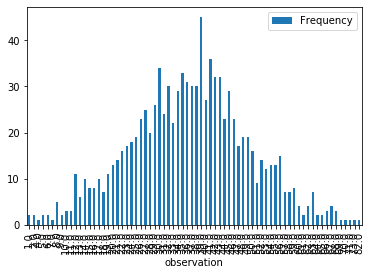

In [190]:
# your code here

pop = roll_dice = pd.read_csv('/home/inrx/Ironhack/Labs-Ironhack/lab-understanding-descriptive-stats/data/ages_population.csv')
pop.head()

pop['Frequency'] = pop.groupby('observation')['observation'].transform('count')
df_freq = pop.groupby('observation', as_index=False).max()
df_freq.plot(x=["observation"], y=['Frequency'], kind = "bar")

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [189]:
# your code here

print (pop['observation'].mean())

print (round(pop['observation'].std(),2))

36.56
12.82


In [22]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


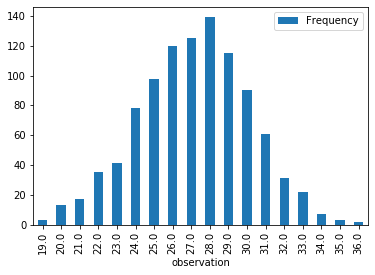

In [193]:
# your code here
path = "/home/inrx/Ironhack/Labs-Ironhack/lab-understanding-descriptive-stats/data/ages_population2.csv"
pop2 = roll_dice = pd.read_csv(path)
pop2['Frequency'] = pop2.groupby('observation')['observation'].transform('count')
df_freq = pop2.groupby('observation', as_index=False).max()
df_freq.plot(x=["observation"], y=['Frequency'], kind = "bar")

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [195]:
"""
Like in step 1, the frequency distribution is close to a normal distribution, although there is a small
skew to the left. 
The main difference is that the numbers are now in bins, so the details are lost, and the plot more 
normalized
"""

'\nLike in step 1, the frequency distribution is close to a normal distribution, although there is a small\nskew to the left. \nThe main difference is that the numbers are now in bins, so the details are lost, and the plot more \nnormalized\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [196]:
# your code here

print (pop2['observation'].mean())

print (round(pop2['observation'].std(),2))

27.155
2.97


In [197]:
"""
The mean and the standard deviation have droped. 
"""

'\nThe mean and the standard deviation have droped. \n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


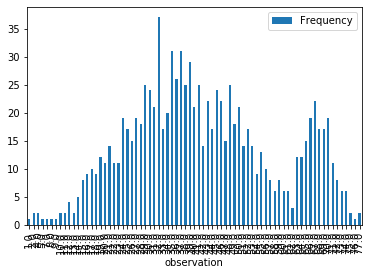

In [198]:
# your code here
path = "/home/inrx/Ironhack/Labs-Ironhack/lab-understanding-descriptive-stats/data/ages_population3.csv"
pop3 = roll_dice = pd.read_csv(path)
pop3['Frequency'] = pop3.groupby('observation')['observation'].transform('count')
df_freq = pop3.groupby('observation', as_index=False).max()
df_freq.plot(x=["observation"], y=['Frequency'], kind = "bar")

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [203]:
# your code here

mean_pop3 = pop3['observation'].mean()
print (mean_pop3)

print (round(pop3['observation'].std(),2))

41.989
16.14


In [200]:
"""
Since the values have change, we now can see that there is a peak of frequency before the median values,
there is a rise of frequency of values in the last quartile, as well, that elevate the mean. 
"""

'\nSince the values have change, we now can see that there is a peak of frequency before the median values,\nthere is a rise of frequency of values in the last quartile, as well, that elevate the mean. \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [204]:
# your code here

Q1 = (pop3.loc[int(len(df.index)/4-1),'observation'] + pop3.loc[int(len(df.index)/4),'observation'])/2
Q2 = (pop3.loc[int(len(df.index)/2-1),'observation'] + pop3.loc[int(len(df.index)/2),'observation'])/2
Q3 = (pop3.loc[int(len(df.index)*3/4-1),'observation'] + pop3.loc[int(len(df.index)*3/4),'observation'])/2
Q4 = float(pop3.loc[int(len(df.index)-1),'observation'])
print (Q1, Q2, Q3, Q4)

Q2- mean_pop3

22.5 53.0 53.0 30.0


11.011000000000003

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here

In [35]:
"""
your comments here
"""

'\nyour comments here\n'